
  ## Vehicle Silhouettes Dataset
  
  #Project 5 | Author - Mohit Pundir
  #Purpose - Classify the given silhouettes as one of the four vehicle type.

    Input the data
    Understand the features
    Clean data
    Scale data
    Covariance matrix
    Eigen values
    Eigen vectors
    Principal component selection
    PCA scores
    Conclusion

In [49]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1)
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('vehicle.csv')

In [3]:
print('Shape of the data set: ' + str(df.shape))

Shape of the data set: (846, 19)


In [4]:
columns_names=df.columns.tolist()
print("Columns names:",columns_names)

Columns names: ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


In [5]:
# CHECKING FOR MISSING VALUES
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 14


In [6]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
# Handling the missing Values
# Decription:
# This dataset was not able to indentity the difference between 2 cars. Hence filling any missing values with average 
# can lead to futher not been able to solve this issue. Example - If we would take average of circularity of all vehicle
# for the missing values, it would be a mess.
#   Action: Approach 1
#    >I will sort the dataset on class so that most of the cars data is together, then take mean of car and fill it for car.
#    >Similiarly for other vehicles means of bus for bus missing data.
#   Action: Approach 2
#    > Drop the rows with missing data, better as the captures values might mislead if we take the mean here, as
#      This dataset prediction needs accuracy

In [8]:
df=df.dropna()

In [9]:
print('Shape of the dataset after handling Missing values: ' + str(df.shape))


Shape of the dataset after handling Missing values: (813, 19)


In [10]:
# CHECKING FOR MISSING VALUES AGAIN
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [11]:
df.corr()
#df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


In [12]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [13]:
# Replacing Class column with Digit as its dependent variable.
# Categorical columns
Summary=df.describe().T
Continuous=Summary.index
Column_name=df.columns
All=[]
for i in range(len(Continuous)):
    for j in range(len(Column_name)):
        if Continuous[i]!=Column_name[j]:
            All.append(Column_name[j])
Categorical=list(set(All)-set(Continuous))
print("\nCategorical variables found in the dataset:\n",Categorical)

print("\n\nDo you wish to convert categorical features to continuous ? ")
answer=str(input())

le = preprocessing.LabelEncoder()

if answer=='yes':
    print("Enter the name of feature columns separated by <,>")
    Transform=str(input())
    print("\nYou have chosen the following:\n",Transform)
    Trans = list(Transform.split(","))
    for i in range(len(Trans)):
        a=Trans[i]
        df[a] = le.fit_transform(df[a])

        print("\n-------------------------------------------------------------------------")

print(df.head())


shape=df.shape
Row=shape[0]
Column=shape[1]


Categorical variables found in the dataset:
 ['class']


Do you wish to convert categorical features to continuous ? 
yes
Enter the name of feature columns separated by <,>
class

You have chosen the following:
 class

-------------------------------------------------------------------------
   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0            

In [14]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


## Observing Correlation again

In [15]:
df.corr()
#df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806,-0.037391
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331,-0.161018
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228,-0.067445
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895,-0.199219
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566,-0.114292
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283,0.202235
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424,-0.287590
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408,0.342712
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202,-0.255354
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792,-0.025539


### Visualise Correlation using sns

Text(0.5, 1.0, 'Correlation between different fearures')

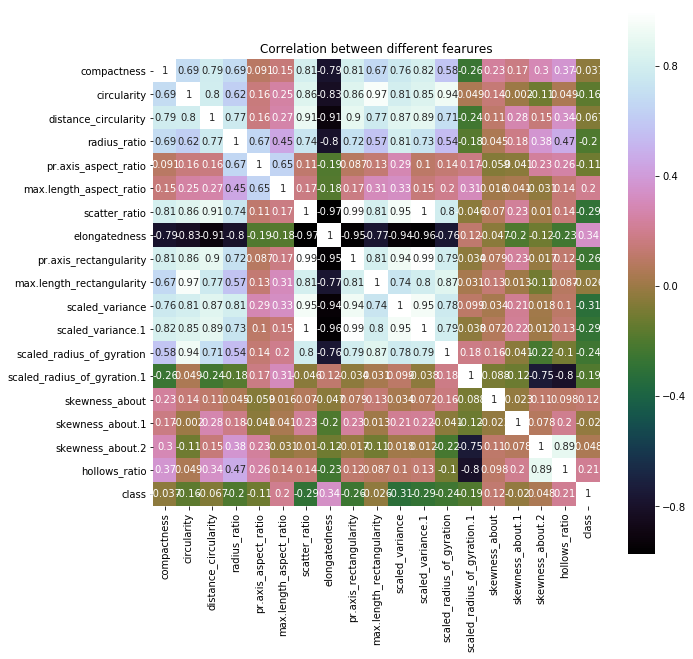

In [16]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [17]:
# Observation
# Class is strongly realted to compactness, distance_circularity, max_length_aspect ratio, hollow ratio etc..
# Elongatedness is weakly realted to the other factors. But yes, elongatedness does influence class.
# compactness to scaled radius are strongly correlated.

REMEMBER

As per our catagorical variable.

    0 - BUS
    1 - CAR
    2 - VAN

In [18]:
#df=df.drop(['elongatedness','pr.axis_aspect_ratio'], axis=1)


Note : Removing above 2 columns resulted in less accuracy for our Naive bayes model later. Hence keeping it as it is.

Text(0.5, 1.0, 'Correlation between different fearures')

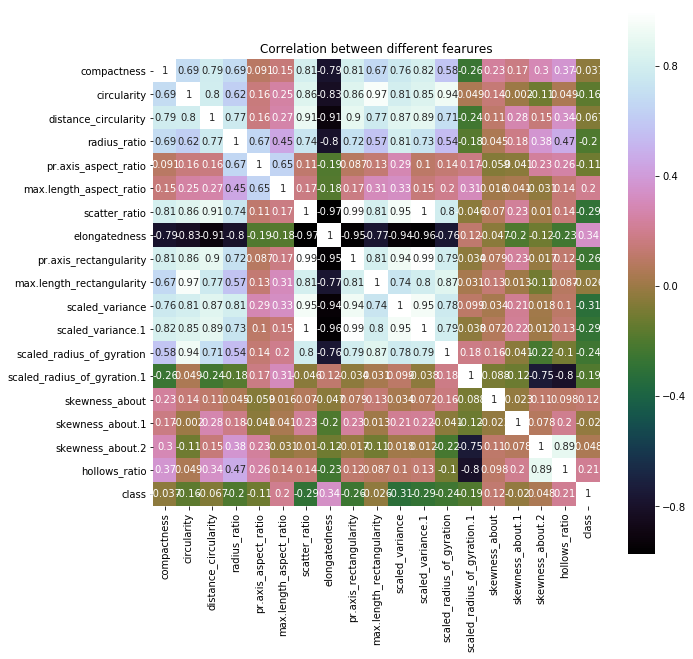

In [19]:
# Plotting again
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

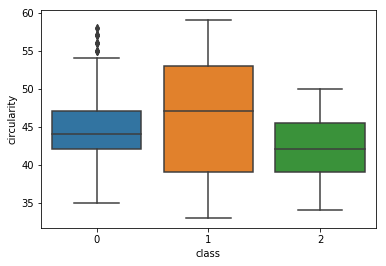

In [20]:
# Visualisation 1
sns.boxplot(y='circularity',x='class',data=df)

##### Observation : We see bus data has many outliers with respect to circularity data. lets see more.


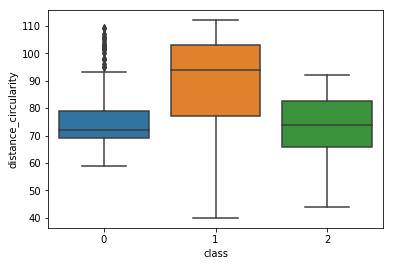

In [21]:
# Visualisation 2
sns.boxplot(y='distance_circularity',x='class',data=df)

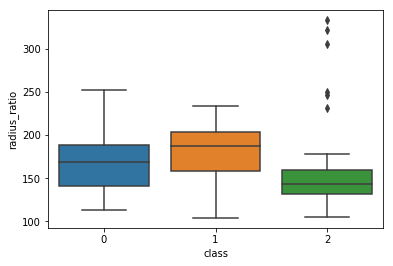

In [22]:
# Visualisation 3
sns.boxplot(y='radius_ratio',x='class',data=df)

#### Detecting / Handeling the outliers

In [23]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.16323063 0.52040788 0.06066872 ... 0.3218087  0.17183708 1.44341545]
 [0.32287376 0.61912319 0.12406675 ... 0.00340009 0.44231829 1.44341545]
 [1.2569655  0.84598818 1.51882349 ... 0.1592043  0.03659647 0.01753846]
 ...
 [1.5000177  1.49714879 1.20183332 ... 0.3218087  0.7127995  0.01753846]
 [0.93050425 1.43307395 0.25632145 ... 0.16600449 0.09864413 0.01753846]
 [1.05203035 1.43307395 1.01709784 ... 0.4844131  0.77484716 1.44341545]]


In [24]:
threshold = 3
print(np.where(z > 4))
# Removing outliers where Z score is greater than 4. PS: not being very tough here.

(array([  4,   4,   4,  33,  33,  33,  33,  92,  92,  92, 125, 125, 125,
       268, 268, 360, 360, 360, 360, 360, 490, 490, 673, 673]), array([ 4,  5, 13,  3,  4,  5, 13,  4,  5, 13,  3,  4,  5,  4,  5,  3,  4,
        5, 10, 13,  4,  5,  4,  5]))


In [25]:
df = df[(z < 4).all(axis=1)]

In [26]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0


In [27]:
df.shape

(805, 19)

In [28]:
# No Outliers now. looks good.
# sns.boxplot(y='pr.axis_aspect_ratio',x='class',data=df)

## Data Standardisation

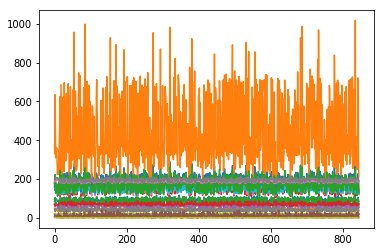

In [29]:
# prior to scaling
plt.plot(df)
plt.show()

/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


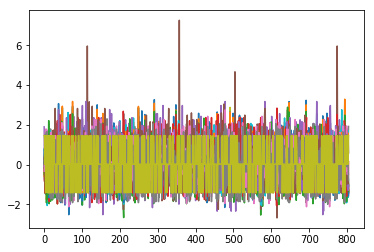

In [30]:
# Scale data
from sklearn.preprocessing import StandardScaler

DBS=StandardScaler().fit_transform(df)

plt.plot(DBS)
plt.show()

In [31]:
# covariance matrix

cv=np.cov(DBS.T)

print("covariance matrix:\n\n",cv)

covariance matrix:

 [[ 1.00124378  0.69345508  0.79105545  0.74905355  0.19511794  0.44087575
   0.814916   -0.78894275  0.81527369  0.67988258  0.79538654  0.82112232
   0.58616385 -0.26670072  0.23027125  0.16660308  0.29302233  0.37132776
  -0.03613636]
 [ 0.69345508  1.00124378  0.79954098  0.65423396  0.20612707  0.49976029
   0.86098531 -0.82746331  0.85924924  0.9673566   0.82171556  0.85405553
   0.93706707  0.05118929  0.14328816 -0.00232591 -0.11394102  0.04980094
  -0.16435368]
 [ 0.79105545  0.79954098  1.00124378  0.82080402  0.2537773   0.59307968
   0.91086573 -0.91444289  0.89928403  0.77567607  0.89009229  0.89375925
   0.70849633 -0.26643794  0.10996761  0.27682841  0.14350518  0.34234333
  -0.07071364]
 [ 0.74905355  0.65423396  0.82080402  1.00124378  0.66648862  0.42673488
   0.80241771 -0.85509206  0.77493238  0.59076762  0.80713072  0.7920682
   0.56804672 -0.41117849  0.05805964  0.19429554  0.41774748  0.50910313
  -0.24442882]
 [ 0.19511794  0.20612707  0.253

In [32]:
#eigen values and vectors

eig_vals,eig_vecs=np.linalg.eig(cv)    # Eigen values and Eigen vectors
print("\nEigen Values: \n",eig_vals,"\n")    # print eigen values
print("Eigen Vectors: \n",eig_vecs)    # print eigen vectors


Eigen Values: 
 [9.86611847e+00 3.39194555e+00 1.59429837e+00 1.18096685e+00
 9.92941221e-01 6.74455187e-01 4.06493651e-01 3.40877829e-01
 2.08866049e-01 1.00560918e-01 8.47667554e-02 5.92097225e-02
 4.32339487e-02 2.68022621e-02 2.07657860e-02 3.54509207e-04
 5.93098746e-03 1.15220517e-02 1.35217202e-02] 

Eigen Vectors: 
 [[-2.70488265e-01  9.24984844e-02 -9.39085133e-02 -3.82889450e-02
   1.87232101e-01 -2.24980553e-01 -3.02076169e-01  2.08439159e-01
  -6.57071458e-01  4.65561968e-01  2.13295415e-03  1.37203933e-01
   9.49433165e-02 -6.75489812e-02 -8.10835876e-02 -7.37848673e-05
  -2.75398378e-03  1.21045624e-02  4.47978840e-04]
 [-2.86466650e-01 -1.30128813e-01 -1.18900691e-01  1.90108125e-01
  -5.40684139e-02  1.52843292e-02  1.21572965e-01 -3.70317613e-01
  -9.32305620e-02  4.81542028e-02  1.81263066e-01 -1.68620441e-02
  -7.23130636e-02  1.97426670e-02  3.03656951e-01 -2.21047562e-02
  -2.11394699e-01  7.12992104e-01 -1.18652999e-02]
 [-2.99776038e-01  5.37184631e-02 -8.488919

In [33]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.866118473659455
3.391945549793968
1.5942983728237472
1.180966846064349
0.9929412208318338
0.6744551871600512
0.40649365051477154
0.3408778293860468
0.20886604893656902
0.1005609183689491
0.08476675538590939
0.05920972247451285
0.04323394868592209
0.02680226214155807
0.020765785999091218
0.013521720230579154
0.01152205167222912
0.005930987459908061
0.00035450920658385774


In [34]:
tot = sum(eig_vals)
var_exp = [(i / tot)*10 for i in sorted(eig_vals, reverse=True)]

In [36]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(19,1), 
                      eig_pairs[1][1].reshape(19,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.27048826  0.09249848]
 [-0.28646665 -0.13012881]
 [-0.29977604  0.05371846]
 [-0.27534427  0.18747419]
 [-0.10291413  0.23000988]
 [-0.17218375  0.11915897]
 [-0.31064427 -0.07289928]
 [ 0.30870988  0.01538807]
 [-0.30730135 -0.08452805]
 [-0.274155   -0.10850864]
 [-0.30417156 -0.07485025]
 [-0.30787155 -0.07846982]
 [-0.26194026 -0.2036882 ]
 [ 0.04894758 -0.50621129]
 [-0.03839594  0.04961044]
 [-0.06277324  0.08677446]
 [-0.03772853  0.49503384]
 [-0.08610021  0.50688914]
 [ 0.06994499  0.15303504]]


In [37]:
Y = DBS.dot(matrix_w)
Y

array([[-0.45227244,  0.82108391],
       [ 1.63729683,  0.58434828],
       [-3.87911613, -0.2034081 ],
       ...,
       [-5.04825574,  0.140911  ],
       [ 3.26185836,  1.00529513],
       [ 5.01032745, -0.25228361]])

### PCA

Text(0, 0.5, 'Cumulative explained variance')

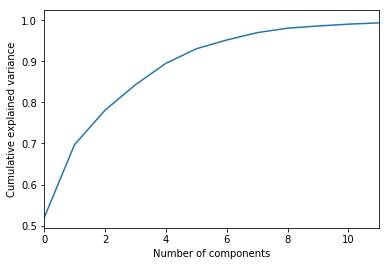

In [38]:
from sklearn.decomposition import PCA
pca = PCA().fit(DBS)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,11,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [39]:
# OBSERVATION
# We have around 9 component that exhibit any sort of cumulative varience on the data.
# Hence we will remove later components.

#### The above plot shows almost 95% variance by the first 9 components. Therfore we can drop 11th above components.

In [40]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=9)
Y_sklearn = sklearn_pca.fit_transform(DBS)

In [41]:
print(Y_sklearn)

[[ 0.45227244 -0.82108391 -0.86035992 ... -0.99558213 -0.63121971
   0.29967268]
 [-1.63729683 -0.58434828 -1.70368222 ... -0.1825739   0.06302842
  -0.25171097]
 [ 3.87911613  0.2034081  -0.4833487  ... -0.48795732  0.64247231
  -0.365832  ]
 ...
 [ 5.04825574 -0.140911   -0.23906874 ... -0.21463245  0.72913583
   0.2733128 ]
 [-3.26185836 -1.00529513  0.5938627  ...  0.26370332 -0.30229434
  -0.49021769]
 [-5.01032745  0.25228361 -0.53117845 ... -0.98470161 -0.61254886
  -0.17572893]]


In [42]:

print('\033[95m \033[1m Shape of the dataset after processing: ' + str(Y_sklearn.shape))

  Shape of the dataset after processing: (805, 9)


#### Information

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions.

## Naive _Bayesian

In [43]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,805.00000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.00000,805.000000,805.000000
mean,93.71677,44.798758,82.085714,168.114286,61.233540,8.195031,168.739130,40.952795,20.572671,147.850932,187.852174,439.406211,174.183851,72.031056,6.365217,12.708075,189.02236,195.762733,0.982609
std,8.24300,6.174434,15.838782,32.000845,5.667189,2.315957,33.194497,7.832212,2.581266,14.553902,30.649994,175.823925,32.468599,6.323987,4.925392,8.956945,6.16074,7.409628,0.698040
min,73.00000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.00000,181.000000,0.000000
25%,87.00000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,67.000000,2.000000,6.000000,184.00000,191.000000,0.000000
50%,93.00000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,173.000000,71.000000,6.000000,11.000000,189.00000,197.000000,1.000000
75%,100.00000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.00000,201.000000,1.000000
max,119.00000,59.000000,112.000000,246.000000,76.000000,25.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,90.000000,22.000000,41.000000,206.00000,211.000000,2.000000


In [44]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

array = df.values
X = array[:,0:10] # select all rows and first 10 columns which are the attributes
Y = array[:,18]  # select all rows and the 18th column which is the classification
test_size = 0.20 # taking x:x training and test set and trying more combination
seed = 7  # Random number seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [45]:
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [46]:
# make predictions
expected = Y_test
predicted = model.predict(X_test)

In [47]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.26      0.39        35
         1.0       0.93      0.70      0.80        88
         2.0       0.46      1.00      0.63        38

   micro avg       0.68      0.68      0.68       161
   macro avg       0.73      0.65      0.61       161
weighted avg       0.79      0.68      0.67       161

[[ 9  5 21]
 [ 2 62 24]
 [ 0  0 38]]


In [48]:
print('Accuracy : {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy : 0.68


#### Observations

1. Giving an Accuracy of 70 %
2. Precision of BUS and VAN prediction is Good with 82% and 93%
3. Precision of CAR prediction is not Good with 47%. We started with two type of cars (as indicated in the Case   description) which our model is unable to distinguish within the two type of cars. 